# 선형회귀(특성공학 과 규제가 필요한 이유)

## K-최근접 이웃회귀의 한계
- 데이터 범위 밖의 새로운 데이터는 예측이 불가능하다는 것이다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight, random_state = 42)

In [20]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [21]:
# k-최근접 이웃 회귀 알고리즘(이웃수 = 3)
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [9]:
# 길이가 50cm인 생선의 무게 예측
knr.predict([[50]])

array([1033.33333333])

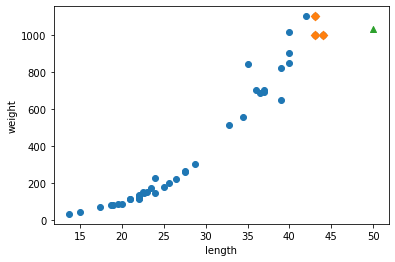

In [17]:
# 길이가 50cm인 생선의 주변 이웃들을 살펴보자
distances, indexs = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)

plt.scatter(train_input[indexs], train_target[indexs], marker = 'D')

plt.scatter(50, 1033, marker = '^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

> 50이라는 큰 값을 입력해도, 평균을 내는 기준(거리)이 40~45 데이터를 바탕으로 생성된다.<br>
따라서 최근접 이웃을 통한 회귀는 새로운 데이터에 대한 예측이 부적절하다.

## LinearRegression 알고리즘

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 모델 학습
lr.fit(train_input, train_target)

LinearRegression()

In [23]:
lr.predict([[50]])

array([1241.83860323])

In [24]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


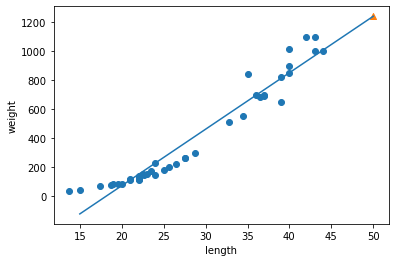

In [30]:
plt.scatter(train_input, train_target)

# 15 ~ 50
plt.plot([15, 50], [15 *lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.8, marker = '^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [31]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


> 길이가 작아지더라도 무게가 음수값을 가질 수는 없고, 전체적인 데이터 분포가 직선보단 곡선을 따르는 것으로 보임<br>
=> **다항회귀의 필요성**

## 다항회귀

In [37]:
# 2차 방정식 그래프를 그리기 위해 길이를 제곱한 항을 추가하는 작업을 진행해야 한다.
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [38]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [41]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [42]:
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [52]:
print(lr.predict([[45**2, 45]]))

[1199.96610822]


In [44]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


- 무게 = 1.01 * 길이<sup>2</sup> + -21.6 * 길이 + 116.05

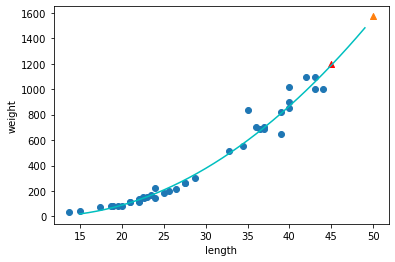

In [59]:
point = np.arange(15, 50)
plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 - 21.6*point + 116.05, color = 'c')

plt.scatter(50, 1573.9, marker = '^')

plt.scatter(45, 1200, marker = '^', color = 'r')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [46]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


# 특성공학과 규제

## 다중회귀(Multiple Regression)
- 여러 개의 특성을 사용한 선형 회귀 알고리즘
- 특성공학(feature engineering) : 기존의 특성을 사용해 새로운 특성을 뽑아내는 것을 말한다.

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/perch_full.csv')

In [62]:
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [63]:
raw = df.to_numpy()

In [69]:
# 생선의 길이, 높이, 두께를 이용한 회귀분석
raw

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [76]:
## length, height, width 3가지 데이터를 통해 weight 데이터를 타깃으로 삼음
weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

## 훈련 데이터셋과 테스트 셋으로 분리

In [80]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(raw, weight, random_state = 42)

### 사이킷런 변환기

In [81]:
# 다항식 변환기
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures : 현재 데이터를 다항식의 형태로 변경하는 역할을 수행

In [90]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
poly.transform([[2, 3]])

array([[1., 2., 3., 4., 6., 9.]])

- 무게 = a * 길이 + b* 높이 + c * 두께 + 1

In [104]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 9)

## 다중 회귀 모델

In [141]:
## 과대적합 과소적합 문제를 해결하기위한 방법 中 적절한 차원을 설정(좀더 복잡하게 만드는 방법)
## PolynomialFeatures(특성공학) 함수 활용 , transfrom 활용 => p.335 참고

In [109]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly = plolt.transform(train_input)
train_poly.shape

In [128]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 9)

In [129]:
lr.fit(train_poly, train_target)

LinearRegression()

In [130]:
lr.score(train_poly, train_target)

0.9903183436982125

In [131]:
lr.score(test_poly, test_target)

0.9714559911594155

In [216]:
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 55)

In [217]:
lr.fit(train_poly, train_target)

LinearRegression()

In [218]:
lr.score(train_poly, train_target)

0.9999999999938143

In [219]:
lr.score(test_poly, test_target)

-144.40744532797535

> 지금까지, 과대적합을 해결하고자 차수를 조정(모델의 복잡도 조정)해보았다<br>
이제 '규제'를 통해 문제를 해결해보자

> - 규제 : 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 제약을 가하는 것

In [145]:
## sklearn.preprocessing 
## =>  싸이킷런 데이터 전처리 스케일 조정(스케일러) [sklearn preprocessing StandardScaler MinMaxScaler]

In [211]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [178]:
print('기존 훈련데이터 :',train_input.shape)
print('차수를 높인 데이터 :',train_poly.shape)
print('차수를 높이고 다시 스케일링한 데이터 :',train_scaled.shape)

기존 훈련데이터 : (42, 3)
차수를 높인 데이터 : (42, 55)
차수를 높이고 다시 스케일링한 데이터 : (42, 55)


In [212]:
train_input[0][0]

19.6

In [213]:
train_input[0][54]

IndexError: index 54 is out of bounds for axis 0 with size 3

In [190]:
train_poly[0][0]

19.6

In [191]:
train_poly[0][54]

259.6377985024

In [189]:
train_scaled[0][0]  ## 상위의 값이 스케일링 된것을 확인할 수 있음

-1.0133961909006286

In [188]:
train_scaled[0][54]  ## 상위의 값이 스케일링 된것을 확인할 수 있음

-0.7514374590509498

### 릿지회귀

In [215]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [149]:
print(ridge.score(test_scaled, test_target))  ## -144.40744532797535 에서 다시 복귀

0.9790693977615386


- 릿지 회귀(Ridge Regression) 모델 : 계수를 제곱한 값을 기준으로 규제 적용
- 라쏘 회귀(Lasso Regression) 모델 : 계수의 절대값을 기준으로 규제 적용
- 두 알고리즘 모두 계수의 크기를 줄이지만 라소는 아예 0으로 만들 수도 있어서 일반적으로 릿지를 조금 더 선호함
- alpha : 릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절하는 하이퍼파라미터
- alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도한다.
- alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 크다.
- 하이퍼파라미터(Hyperparameter) : 머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터

In [197]:
# 훈련 데이터셋과 테스트 데이터셋의 점수가 가장 가까운 지점이 최적의 alpha값이 된다.
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 릿지모델
    ridge = Ridge(alpha = alpha)
    # 릿지모델 훈련
    ridge.fit(train_scaled, train_target)
    # 결정계수(R2 score)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-pack

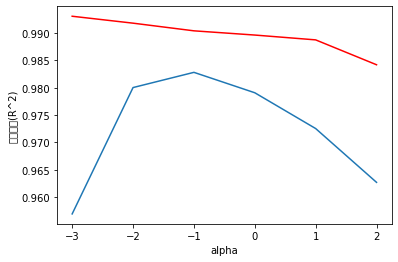

In [202]:
plt.plot(np.log10(alpha_list), train_score, color = 'r')
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('alpha')
plt.ylabel('결정계수(R^2)')

plt.show()

In [199]:
## 빨간선이 훈련데이터, 파란선이 테스트데이터
## 두 지점이 가장 가까운(훈련,테스트 점수차가 적은)지점이 최적의 지점
## 최적의 알파값은 log10(-1) => 0.1 인것을 알 수 있음

- 적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 데이터셋의 점수가 가장 높은 지점 => 0.1

In [203]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465386896


### 라쏘 회귀

In [204]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(train_scaled, train_target))

0.989789897208096
0.989789897208096


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23364.075969939724, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20251.975097475362, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.2370926335934, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s

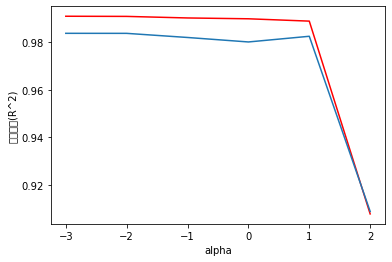

In [208]:
# 훈련 데이터셋과 테스트 데이터셋의 점수가 가장 가까운 지점이 최적의 alpha값이 된다.
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 릿지모델
    lasso = Lasso(alpha = alpha)
    # 릿지모델 훈련
    lasso.fit(train_scaled, train_target)
    # 결정계수(R2 score)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))



plt.plot(np.log10(alpha_list), train_score, color = 'r')
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('alpha')
plt.ylabel('결정계수(R^2)')

plt.show()

In [206]:
## 최적지점 : log10(1) => 10

In [209]:
np.sum(lasso.coef_ == 0)

52

# 실습문제 : 보스턴 집값 예측

In [210]:
from sklearn.datasets import load_boston

boston = load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

## 데이터 확인

In [230]:
boston['data'].shape

(506, 13)

In [231]:
boston['feature_names'].shape

(13,)

In [234]:
boston['target'].shape

(506,)

In [235]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [236]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [238]:
sy = pd.Series(boston.target)
df['price'] = sy

In [240]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [244]:
df.shape

(506, 14)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## 훈련/테스트 데이터셋 분리

In [253]:
b_raw = boston.data

In [254]:
b_target = boston.target

In [255]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(b_raw, b_target, random_state = 41)

In [257]:
train_input.shape

(379, 13)

In [258]:
test_input.shape

(127, 13)

In [264]:
379/(379+127) ## default : 75% / 25%

0.7490118577075099

In [268]:
import seaborn as sns
from scipy import stats

In [277]:
x_data2 = df[['CRIM','RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS']]
x_data2.head()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
0,0.00632,6.575,4.98,396.90,296.0,65.2,18.0,0.538,2.31
1,0.02731,6.421,9.14,396.90,242.0,78.9,0.0,0.469,7.07
2,0.02729,7.185,4.03,392.83,242.0,61.1,0.0,0.469,7.07
3,0.03237,6.998,2.94,394.63,222.0,45.8,0.0,0.458,2.18
4,0.06905,7.147,5.33,396.90,222.0,54.2,0.0,0.458,2.18


In [279]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_input.shape

In [281]:
df.CRIM

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

In [284]:
df["CRIM"]

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

In [303]:
df[["price"]]

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [300]:
heatmap_data = df[["RM","ZN","INDUS","NOX","AGE","PTRATIO","LSTAT","RAD"]]

<AxesSubplot:title={'center':'boston coef'}>

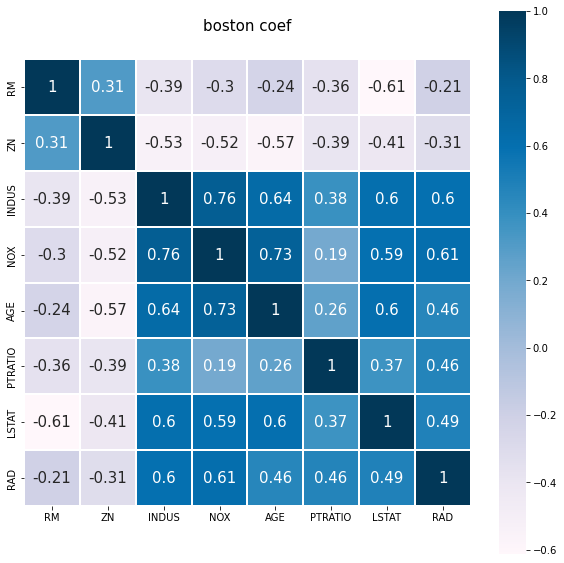

In [302]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 10))
plt.title("boston coef", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 15})

In [309]:
heatmap_data = df[["RM","ZN","INDUS","NOX","AGE","PTRATIO","LSTAT","RAD","B","price"]]

<AxesSubplot:title={'center':'boston coef'}>

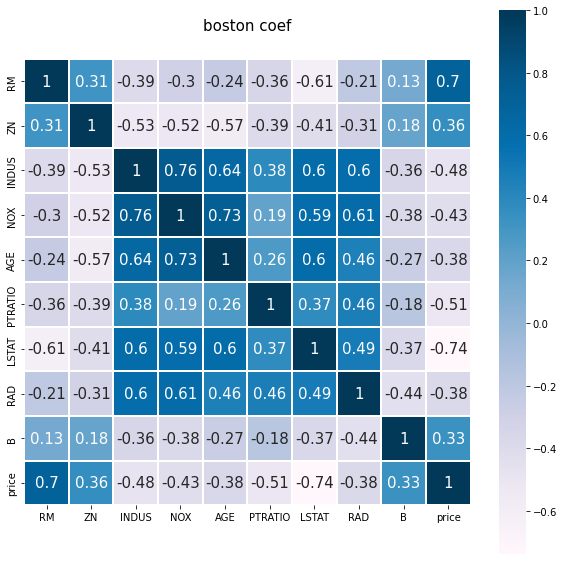

In [310]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 10))
plt.title("boston coef", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 15})

In [ ]:
## 가격과 상관관계가 높게 나타나는 변수 : RM, LSTAT

In [ ]:
## 다중공선성 확인(vif) => 스케일링 => 다시 다중공선성 확인?